In [1]:

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

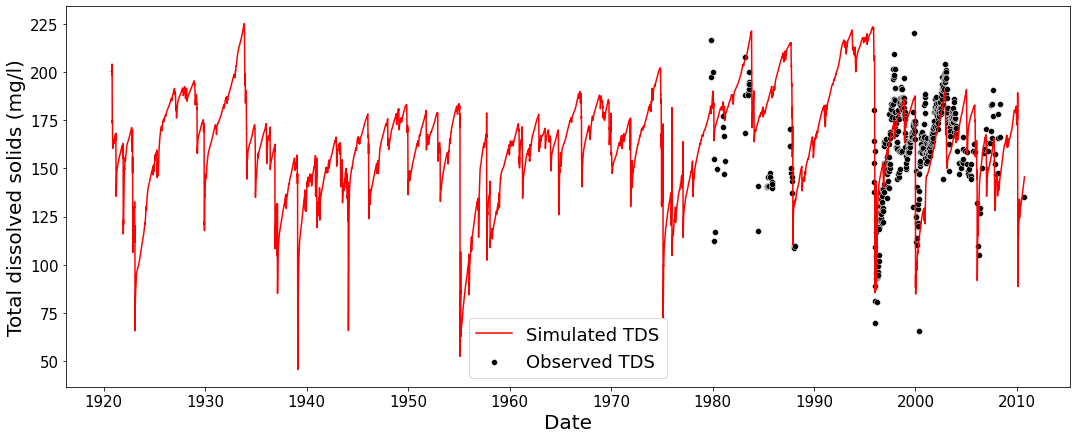

In [3]:
groot_TDS = pd.read_csv("groot_TDS.csv", parse_dates= ['Date'])
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(7)
sns.scatterplot(data=groot_TDS, x='Date', y = "Observed", label = "Observed TDS", color = "black")
sns.lineplot(data=groot_TDS, x='Date', y = "Simulated", label = "Simulated TDS", color = "red")
start_date = datetime.strptime('01/01/1996 00:00','%d/%m/%Y %H:%M')
end_date = datetime.strptime('01/01/2004 00:00','%d/%m/%Y %H:%M')
#plt.xlim([start_date, end_date])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total dissolved solids (mg/l)', fontsize=20)
plt.legend(fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('Grootdraai_TDS_calib.png', dpi = 300)
plt.show()


In [4]:
#start_date = (1996 - 1920) * 365
#end_date = (2007 - 1920) * 365
simulated_FD = []

for i in range(0, len(groot_TDS)):
    if groot_TDS["Simulated"].values[i]> 0:
        #if i > start_date and i < end_date:
        simulated_FD.append({"percentile": 0.0001, "Value": groot_TDS["Simulated"].values[i]})
simulated_FD = pd.DataFrame(simulated_FD)

simulated_FD = simulated_FD.sort_values(by=['Value'], ascending=False)
for i in range(0, len(simulated_FD)):
    simulated_FD["percentile"].values[i] = float((i+1)/(len(simulated_FD) + 1) * 100)
    
    
    
observed_FD = []

for i in range(0, len(groot_TDS)):
    if groot_TDS["Observed"].values[i]> 0:
        observed_FD.append({"percentile": 0.0001, "Value": groot_TDS["Observed"].values[i]})
observed_FD = pd.DataFrame(observed_FD)

observed_FD = observed_FD.sort_values(by=['Value'], ascending=False)
for i in range(0, len(observed_FD)):
    observed_FD["percentile"].values[i] = float((i+1)/(len(observed_FD) + 1) * 100)

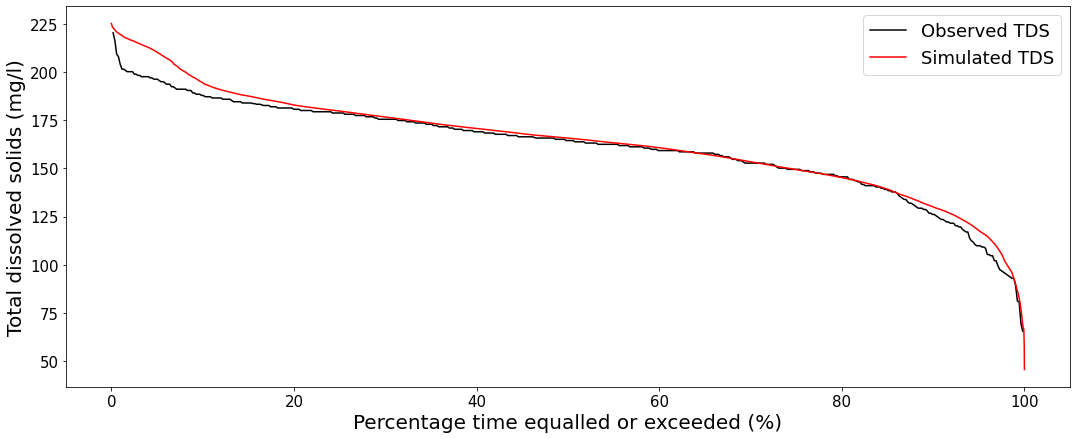

In [5]:
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(7)
sns.lineplot(data = observed_FD, x='percentile', y = "Value", label = "Observed TDS", color = "black")
sns.lineplot(data=simulated_FD, x='percentile', y = "Value", label = "Simulated TDS", color = "red")
#plt.xlim([start_date, end_date])
#plt.ylim([-0.02, 2])
plt.xlabel('Percentage time equalled or exceeded (%)', fontsize=20)
plt.ylabel('Total dissolved solids (mg/l)', fontsize=20)
plt.legend(fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('Grootdraai_TDS_calib_FD.png', dpi = 300)
plt.show()